In [104]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
import warnings
warnings.filterwarnings("ignore")

In [106]:
#load the dataset
df=pd.read_csv("C:\\Users\\vaish\\Downloads\\loan\\loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [107]:
df.isna().mean().round(4) * 100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [108]:
print("Total number of missing values")
print(30 * "-")
print(df.isna().sum())
print(30 * "-")
print("Total missing values are:", df.isna().sum().sum())
print(30 * "-")

Total number of missing values
------------------------------
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64
------------------------------
Total missing values are: 2263364
------------------------------


In [109]:
#list of cloumns to dropped based on large number of missing values
list_cols_dropped = ['tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il',
                   'total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi',
                   'total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util',
                   'mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc',
                   'mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq',
                   'num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl',
                   'num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd',
                   'num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim',
                   'total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit']

In [110]:
for i in list_cols_dropped:
    df = df.drop(columns = i,axis=1)

In [111]:
#drop off columns that have high missing values
list_cols_dropped2= ["next_pymnt_d","mths_since_last_major_derog","annual_inc_joint","dti_joint","verification_status_joint"]
for i in list_cols_dropped2:
    df = df.drop(columns = i,axis=1)

In [112]:
df.shape

(39717, 56)

In [113]:
print("Total number of  values")
print(30 * "-")
print(df.nunique())
print(30 * "-")
print("Total missing  are:", df.nunique().sum())
print(30 * "-")

Total number of  values
------------------------------
id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_

In [114]:
#drop off columns that have only one type of values
list_cols_dropped3= ["collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq",
                     "chargeoff_within_12_mths","delinq_amnt","tax_liens","pymnt_plan","initial_list_status"]
for i in list_cols_dropped3:
    df = df.drop(columns = i,axis=1)

In [115]:
df.shape

(39717, 47)

In [116]:
#categorize the columns
list_id_cols = ["id","member_id","url"]
list_cont_cols = ["total_pymnt","total_pymnt_inv","total_rec_int","last_pymnt_amnt","revol_bal","installment","funded_amnt_inv",
                  "total_rec_prncp","annual_inc","recoveries","dti","collection_recovery_fee","total_rec_late_fee","out_prncp_inv",
                  "out_prncp","funded_amnt","loan_amnt","int_rate",
                  "mths_since_last_record","mths_since_last_delinq","total_acc","open_acc"]

list_catg_cols = ["sub_grade","purpose","delinq_2yrs","inq_last_6mths","grade","home_ownership","pub_rec","issue_d",
                  "verification_status","loan_status","pub_rec_bankruptcies","term",
                  "next_pymnt_d","zip_code","addr_state","last_credit_pull_d",
                  "revol_util","earliest_cr_line","emp_length","emp_title","desc","title"
]


In [117]:
#drop of id columns
for i in list_id_cols:
    df = df.drop(columns = i,axis=1)

In [118]:
df.shape

(39717, 44)

In [119]:
print("Total number of missing values")
print(30 * "-")
print(df.isna().sum())
print(30 * "-")
print("Total missing values are:", df.isna().sum().sum())
print(30 * "-")

Total number of missing values
------------------------------
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal     

In [120]:
df["emp_title"].value_counts()

US Army                               134
Bank of America                       109
IBM                                    66
AT&T                                   59
Kaiser Permanente                      56
                                     ... 
foremost equipment                      1
sodexo                                  1
Total Terminals International, LLC      1
Plastic Ingenuity                       1
Allison Photography                     1
Name: emp_title, Length: 28820, dtype: int64

In [121]:
#replace nan with unknown for emp_title
df["emp_title"] =  df["emp_title"].replace(np.nan,"Unknown")

In [122]:
print("Total number of missing values")
print(30 * "-")
print(df.isna().sum())
print(30 * "-")
print("Total missing values are:", df.isna().sum().sum())
print(30 * "-")

Total number of missing values
------------------------------
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal     

In [123]:
df["desc"].isna().sum()

12940

In [124]:
#taking median as it is months
df["mths_since_last_delinq"].median()

34.0

In [125]:
mdn = df["mths_since_last_delinq"].median()
df["mths_since_last_delinq"] = df["mths_since_last_delinq"].replace(np.nan,mdn)

In [126]:
#mths_since_last_record as it has high number of missing values
df = df.drop(columns="mths_since_last_record",axis=1)

In [127]:
#removing % from revol_util to calculate median
df["revol_util"] = df["revol_util"].astype(str)
df["revol_util"] = df["revol_util"].apply(lambda x: x.replace("%",""))


In [128]:
df["revol_util"].head()

0    83.70
1     9.40
2    98.50
3       21
4    53.90
Name: revol_util, dtype: object

In [129]:
df["revol_util"] = df["revol_util"].astype(float)

In [130]:
mdn = df["revol_util"].median()
df["revol_util"] = df["revol_util"].replace(np.nan,mdn)

In [131]:
df["pub_rec_bankruptcies"].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [132]:
mdn = df["pub_rec_bankruptcies"].median()
df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].replace(np.nan,mdn)

In [133]:
#as last_payment cannot be replaced with other values, dropping off the na values

df = df.dropna(subset =["last_pymnt_d"])

In [134]:
df = df.dropna(subset =["last_credit_pull_d"])

In [135]:
df["title"] =  df["title"].replace(np.nan,"Unknown")

In [136]:
#now All the missing rows have been either removed, corrected. 
#We can create derived columns for datefields issue_d,last_pymnt_d,last_credit_pull_d

df["Issue_Month"] = pd.to_datetime(df["issue_d"],format="%b-%y").dt.month
df["Issue_Year"] = pd.to_datetime(df["issue_d"],format="%b-%y").dt.year

In [137]:
df["last_credit_pull_d"].head()

0    May-16
1    Sep-13
2    May-16
3    Apr-16
4    May-16
Name: last_credit_pull_d, dtype: object

In [138]:
df["Last_pymnt_Month"] = pd.to_datetime(df["last_pymnt_d"],format = "%b-%y").dt.month
df["Last_pymnt_Year"] = pd.to_datetime(df["last_pymnt_d"],format= "%b-%y").dt.year

In [139]:
df["Last_creditpull_Month"] = pd.to_datetime(df["last_credit_pull_d"],format = "%b-%y").dt.month
df["Last_creditpull_Year"] = pd.to_datetime(df["last_credit_pull_d"],format = "%b-%y").dt.year

In [140]:
df["desc"] = df["desc"].replace(np.nan,"Unknown")

In [141]:
#remove %V from int_rate to make it float easy for plotting
df["int_rate"] = df["int_rate"].apply(lambda x: x.replace("%",""))

In [142]:
df["int_rate"] = df["int_rate"].astype(float)

In [143]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'Issue_Month', 'Issue_Year', 'Last_pymnt_Month',
       'Last_pymnt_Year', 'Last_creditpull_Month', 'Last_creditpull_Year'],
      dtype='object')

In [144]:
print("Total number of  values")
print(30 * "-")
print(df.nunique())
print(30 * "-")
print("Total number of values  are:", df.nunique().sum())
print(30 * "-")
print("dtypes  are:", df.dtypes)
print(30 * "-")

Total number of  values
------------------------------
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15365
grade                          7
sub_grade                     35
emp_title                  28770
emp_length                    11
home_ownership                 5
annual_inc                  5309
verification_status            3
issue_d                       55
loan_status                    3
desc                       26482
purpose                       14
title                      19584
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
open_acc                      40
pub_rec                        5
revol_bal                  21699
revol_util           

In [145]:
list_cont_cols = ["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","annual_inc","dti",
                  "total_acc"]
list_cust_behr_cols = ["delinq_2yrs","inq_last_6mths","mths_since_last_delinq","open_acc","pub_rec","revol_bal",
                       "revol_util","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp",
                       "total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
                       "last_pymnt_amnt","pub_rec_bankruptcies"]

In [146]:
list_catg_cols = ["term","grade","sub_grade","emp_title","emp_length","home_ownership","verification_status",
                  "loan_status","desc","purpose","title","zip_code","addr_state","Issue_Month",
                  "Issue_Year"]
list_cust_catg_cols = ["earliest_cr_line","Last_pymnt_Month","Last_pymnt_Year","Last_creditpull_Month","Last_creditpull_Year"]

In [147]:
#Analysisng loan_status rows that are not current as current state is indeterminate
df = df[df["loan_status"] != "Current"]

In [148]:
#Analysing the rows with charged off values
df_chargedoff = df[df["loan_status"] == "Charged Off"]

In [149]:
list_catg_cols1 = ["term","grade","sub_grade","emp_length","home_ownership","verification_status",
                  "purpose","addr_state","Issue_Month","Issue_Year"]

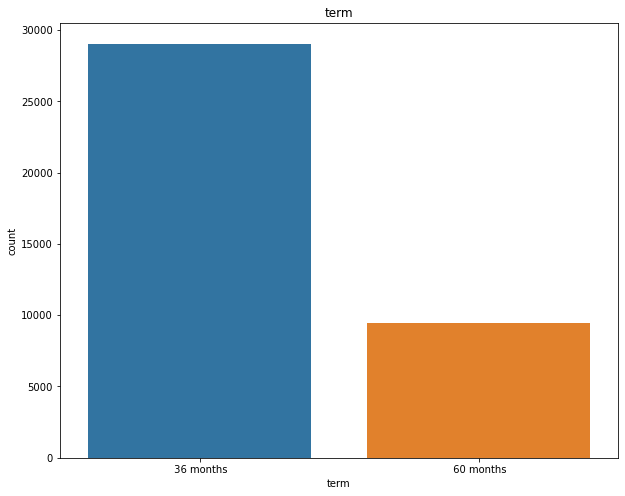

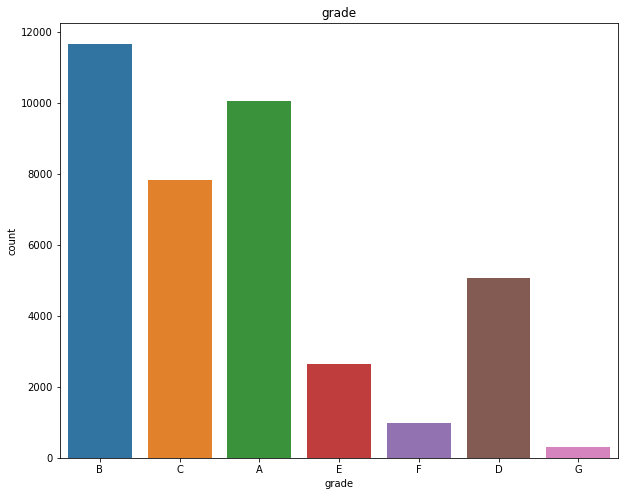

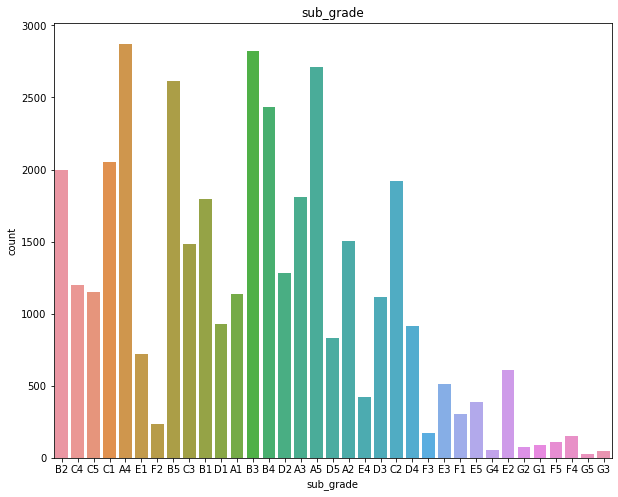

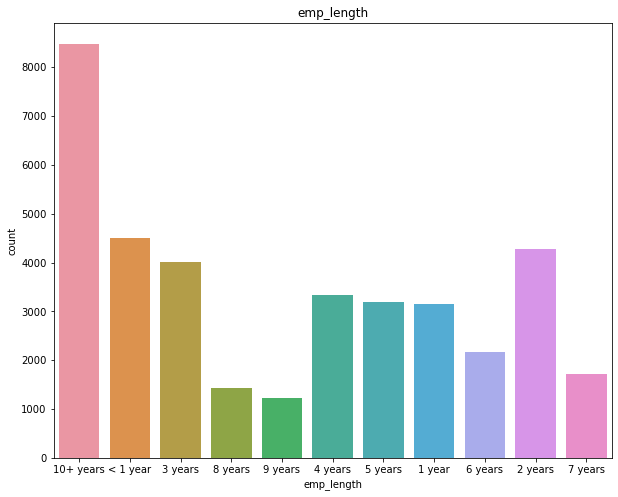

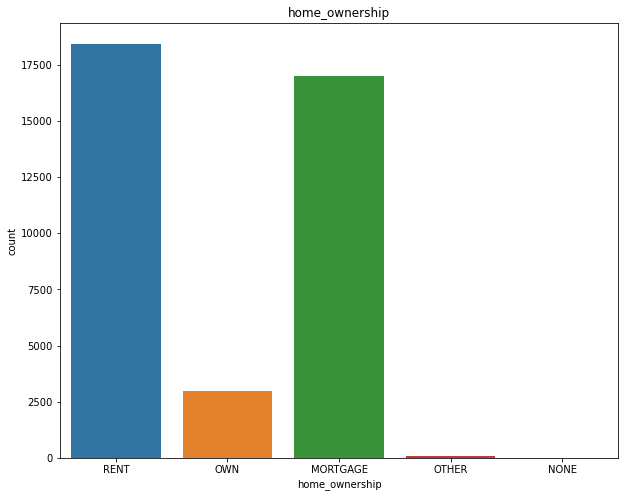

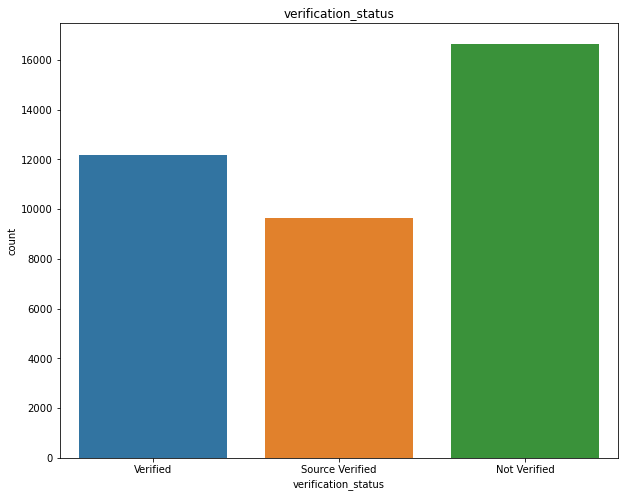

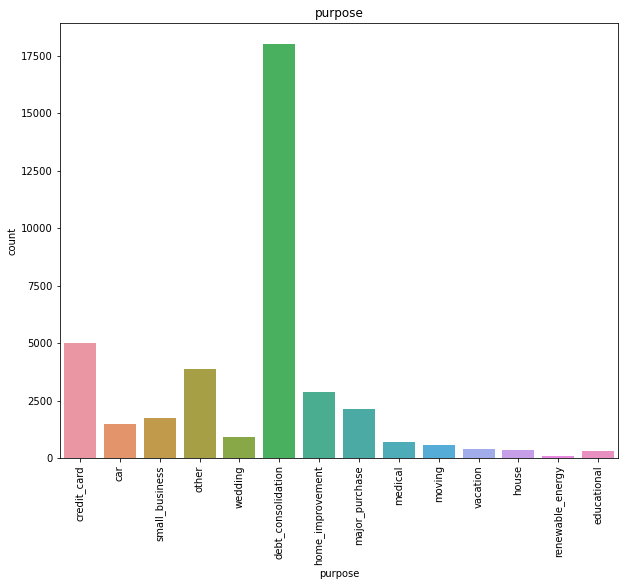

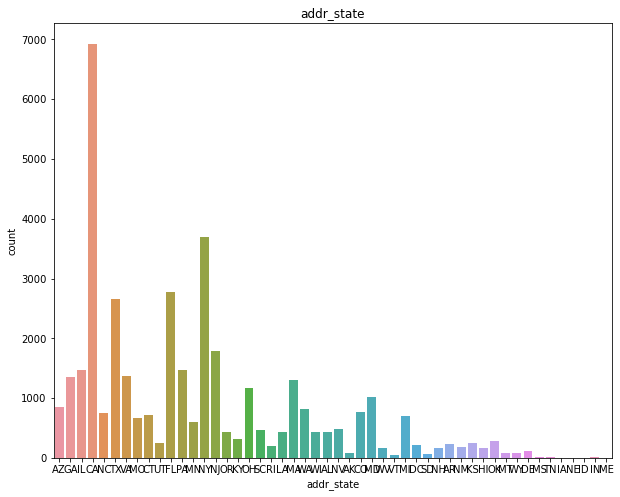

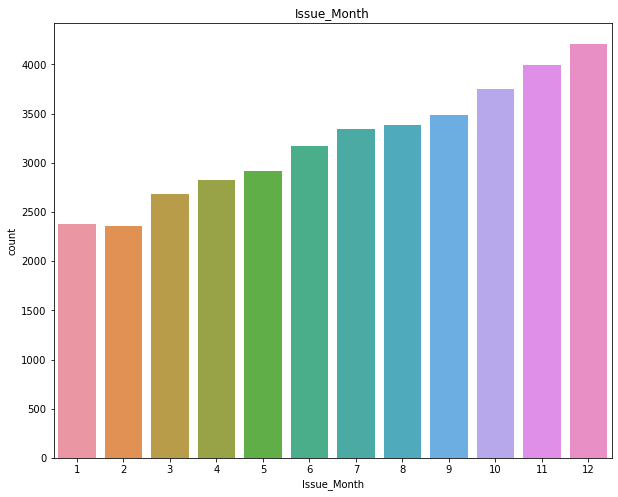

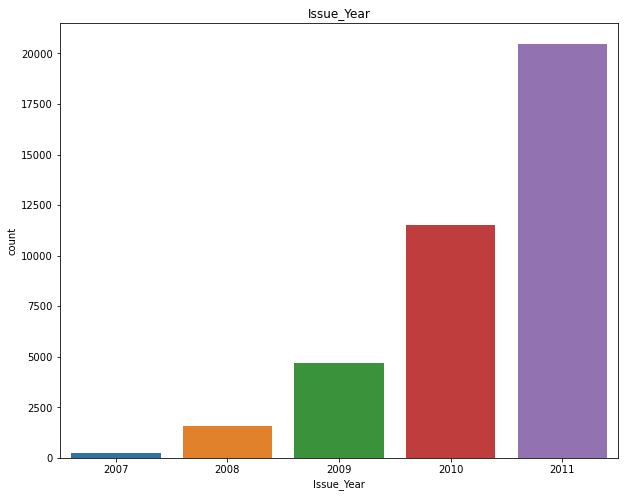

In [150]:
for i in list_catg_cols1:
    plt.figure(figsize=(10,8))
    sns.countplot(df[i])
    if i == "purpose":
        plt.xticks(rotation=90)
    plt.title(i, fontsize=12)
    plt.show()

In [156]:
df["loan_status"].value_counts()

Fully Paid     32949
Charged Off     5555
Name: loan_status, dtype: int64

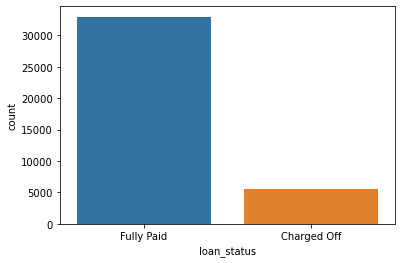

In [157]:
sns.countplot(df["loan_status"])
plt.show()

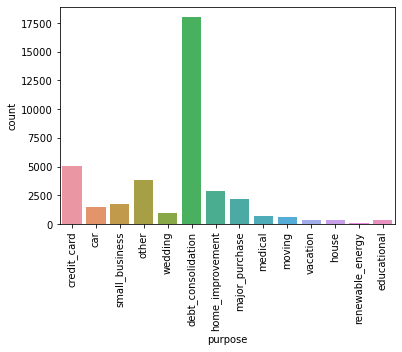

In [158]:
sns.countplot(df["purpose"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# segmented analysis for the segment where loan_status = "charged off"

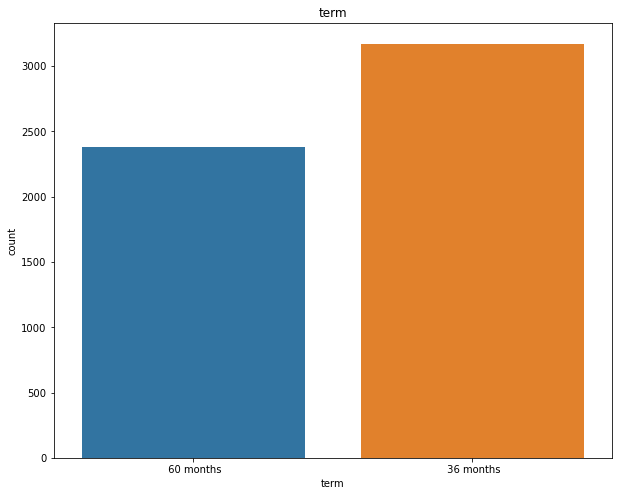

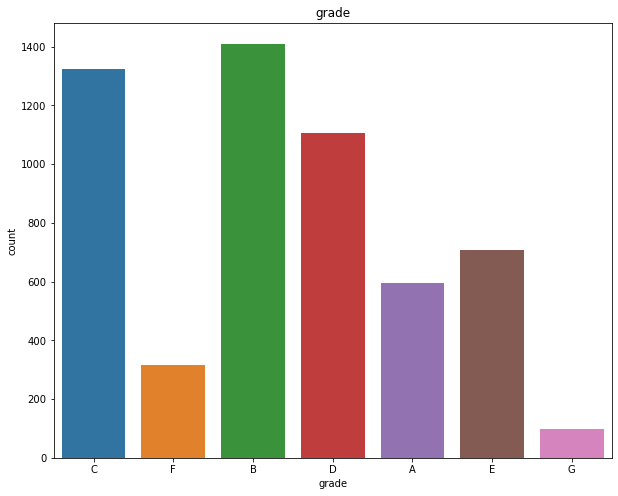

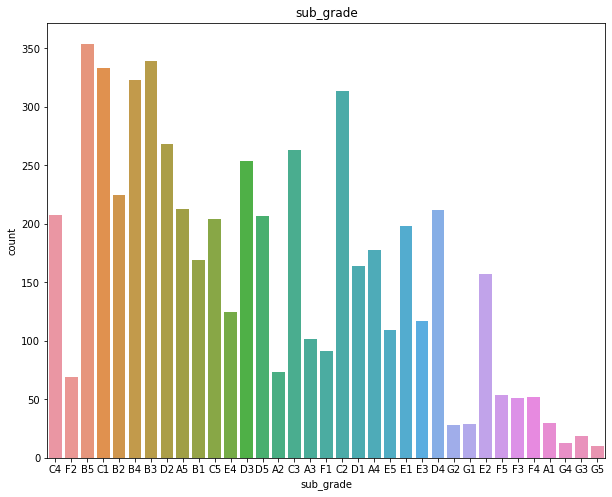

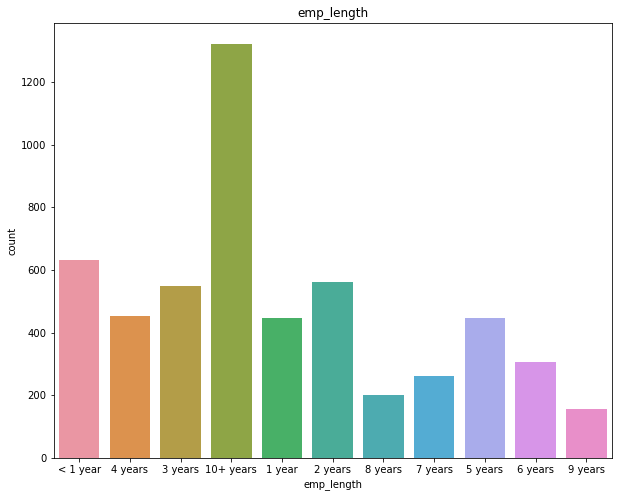

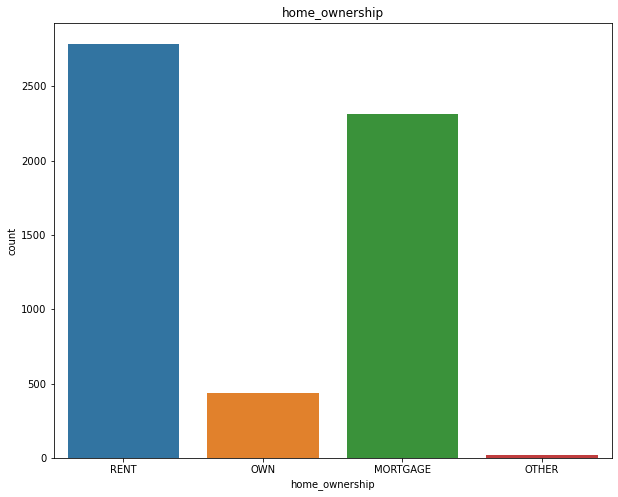

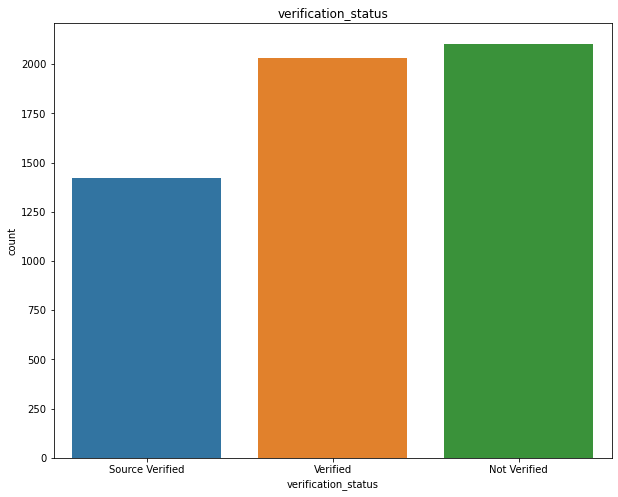

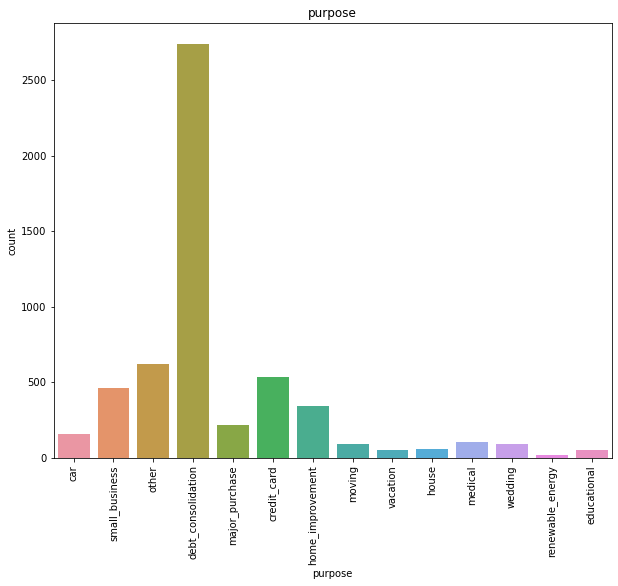

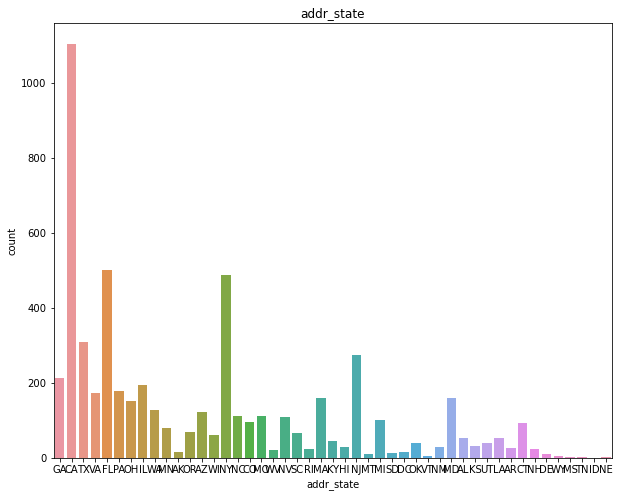

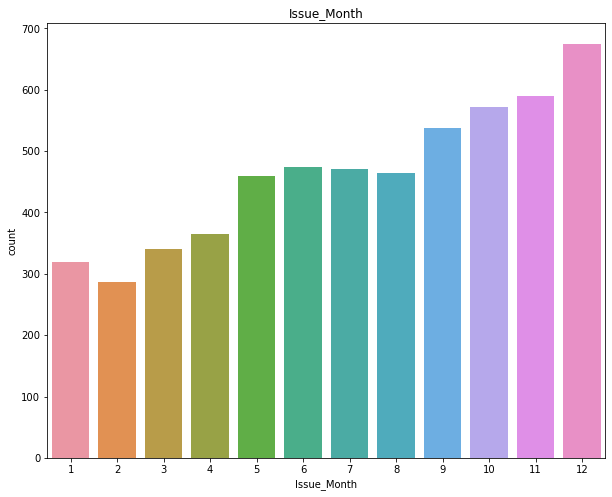

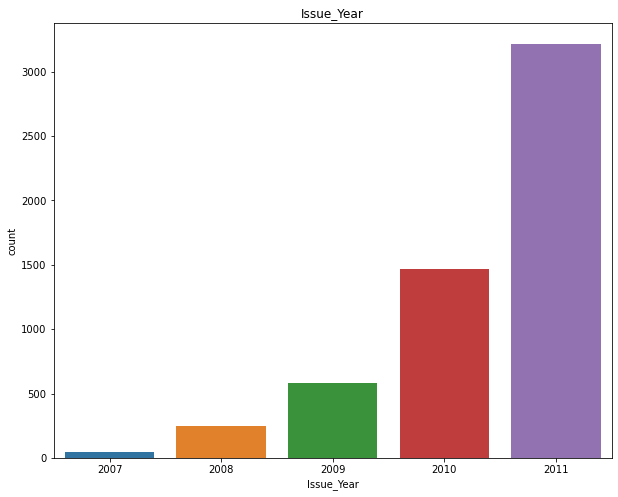

In [151]:
for i in list_catg_cols1:
    plt.figure(figsize=(10,8))
    sns.countplot(df_chargedoff[i])
    if i == "purpose":
        plt.xticks(rotation=90)
    plt.title(i, fontsize=12)
    plt.show()

In [60]:
#bivariate analysis of list of continuous columns and their behaviour against loan_status

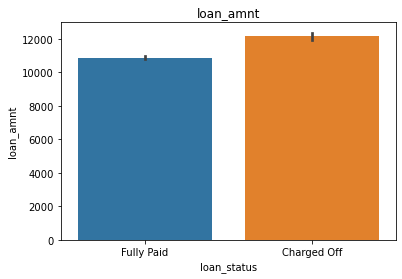

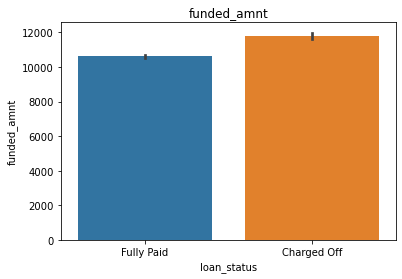

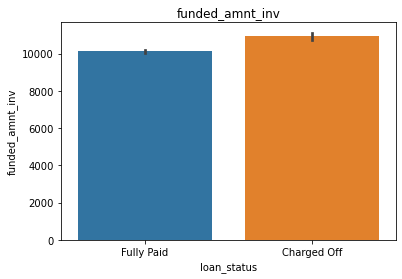

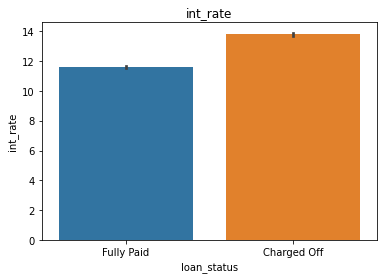

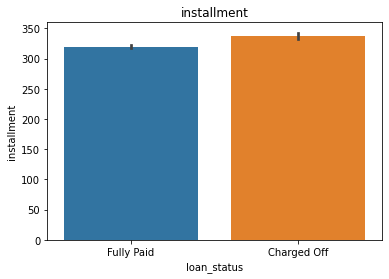

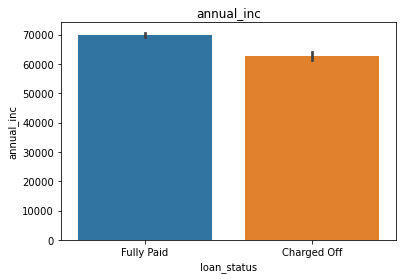

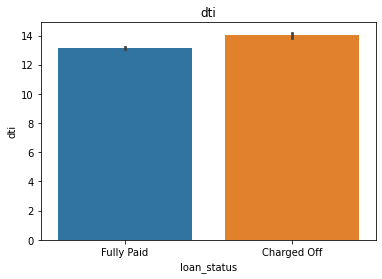

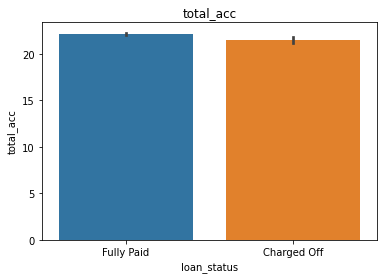

In [152]:
#barplots
for i in list_cont_cols:
    sns.barplot(y=df[i],x=df["loan_status"])
    plt.title(i, fontsize=12)
    plt.show()
    
    

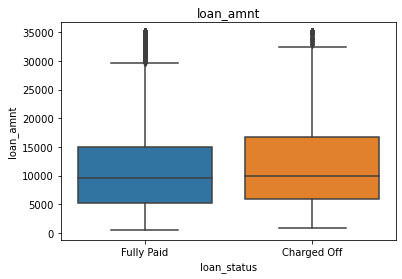

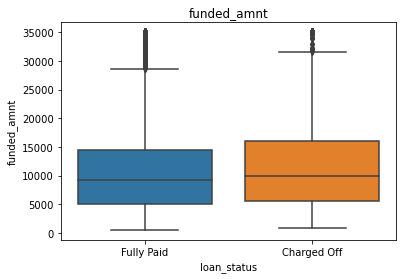

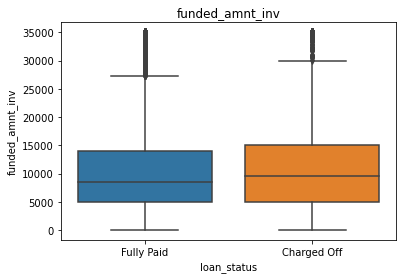

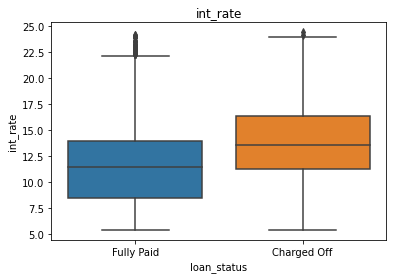

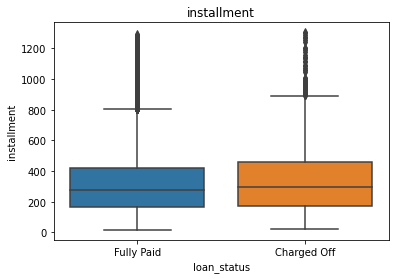

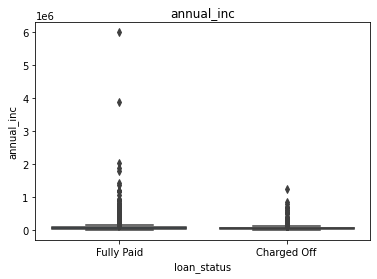

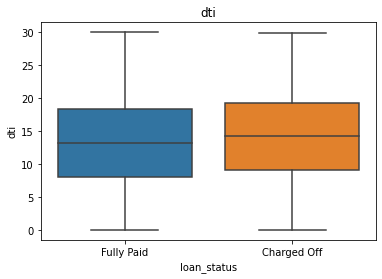

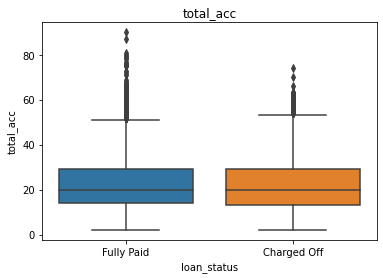

In [153]:
#boxplots
for i in list_cont_cols:
    sns.boxplot(y=df[i],x=df["loan_status"])
    plt.title(i, fontsize=12)
    plt.show()

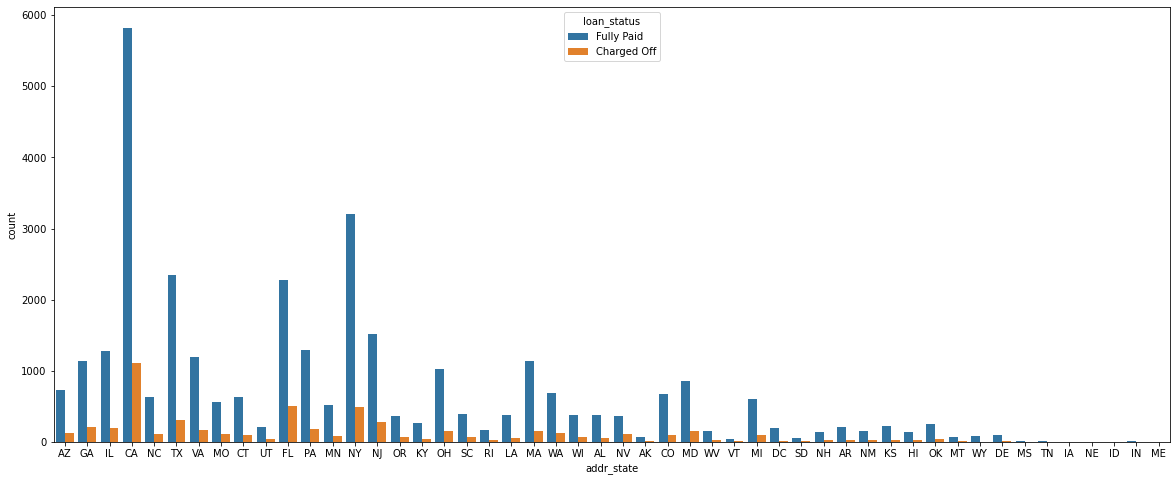

In [159]:
plt.figure(figsize=(20,8))
sns.countplot(df["addr_state"],hue=df["loan_status"])
plt.show()

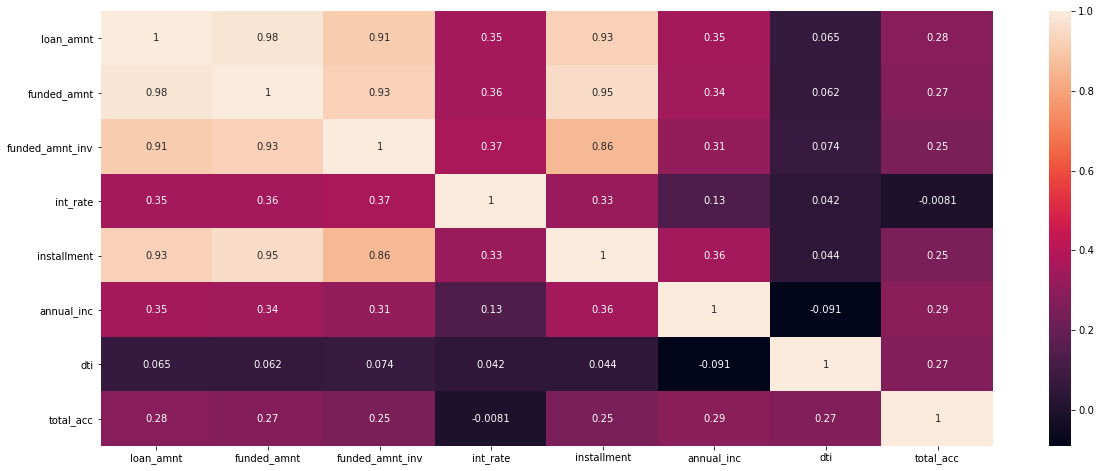

In [154]:
plt.figure(figsize=(20,8))
sns.heatmap(df_chargedoff[list_cont_cols].corr(),annot=True)
plt.show()